In [1]:
from pathlib import Path

from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

from src.data.datasets import get_mask, get_coco_dataset

In [2]:
data_path = Path("/home/valentin/datasets/coco/data")
image_train_path = data_path / "train2017"

annotations_train_path = data_path / "annotations/instances_train2017.json"

In [3]:
coco = COCO(str(annotations_train_path))

loading annotations into memory...
Done (t=13.99s)
creating index...
index created!


In [4]:
# Load the categories in a variable
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)

print(cats)

[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'name': 'cat'}, {'supercategory': 'animal', 'id': 18, 'name': 'dog'}, {'supercategory

In [5]:
def get_class_name(classID, cats):
    for i in range(len(cats)):
        if cats[i]['id']==classID:
            return cats[i]['name']
    return "None"
print('The class name is', get_class_name(76, cats))

The class name is keyboard


In [6]:
import random

Number of images containing all the  classes: 118287


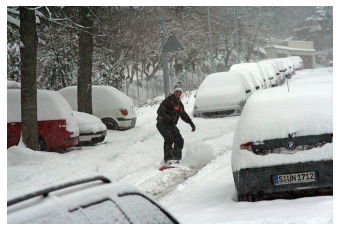

In [7]:
filter_classes = ['cat', 'person']
filter_classes = None

# Fetch class IDs only corresponding to the filterClasses
cat_ids = coco.getCatIds(catNms=filter_classes) 
# Get all images containing the above Category IDs
img_ids = coco.getImgIds(catIds=cat_ids)
# img_ids = coco.getImgIds()
print("Number of images containing all the  classes:", len(img_ids))

# load and display a random image
img = coco.loadImgs(img_ids)
random.shuffle(img)
I = io.imread((image_train_path / img[0]['file_name']))/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
len(img)

In [ ]:
img[0]

In [ ]:
img_ds = tf.data.Dataset.from_tensor_slices(img_ids)

In [ ]:
# Load and display instance annotations
plt.imshow(I)
plt.axis('off')
annotation_ids = coco.getAnnIds(imgIds=img[0]['id'], catIds=cat_ids, iscrowd=None)
annotations = coco.loadAnns(annotation_ids)
coco.showAnns(annotations)

In [ ]:
cat_ids

In [ ]:
annotation_ids

In [ ]:
def get_mask(image_metadata, coco=None, filter_classes=None):
    mask = np.zeros((image_metadata['height'], image_metadata['width']))
    if filter_classes:
        category_ids = coco.getCatIds(catNms=filter_classes)
    else:
        category_ids = coco.getCatIds()
    annotation_ids = coco.getAnnIds(imgIds=image_metadata['id'],
                                    catIds=category_ids,
                                    iscrowd=None)
    annotations = coco.loadAnns(annotation_ids)

    for i in range(len(annotations)):
        pixel_value = category_ids.index(annotations[i]['category_id']) + 1
        mask = np.maximum(coco.annToMask(annotations[i]) * pixel_value, mask)

    return mask


In [ ]:
mask = get_mask(img[0], coco=coco, filter_classes=None)
plt.imshow(mask)
plt.colorbar()


In [ ]:
mask